# Import Packages

In [1]:
import os
import sys
import os.path as path
import numpy as np
import pandas as pd
import csv
import pickle
import json
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from datetime import date, datetime, timedelta, time
from timeit import default_timer as timer
import time

In [2]:
from TrainModel_Helper import *

# Simulation Directory

In [3]:
sim_dir = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI'

# `json` Input Files

In [4]:
json_extract_base = os.path.join(sim_dir, 'InputJson/Extract/json_extract_data')
json_prep_base = os.path.join(sim_dir, 'InputJson/Prep/json_prep_data_label')
json_train_base = os.path.join(sim_dir, 'InputJson/Train/json_train_model')

# Collect Metrics of Desired Trained Models

## All the datasets with 500k rows

### Regression

In [5]:
json_extract_counts = range(15, 23)
json_prep_counts = [1]
json_train_counts = [1, 3, 4, 5, 2]#[3, 5, 1, 2]
FM_label_type = "Regression"

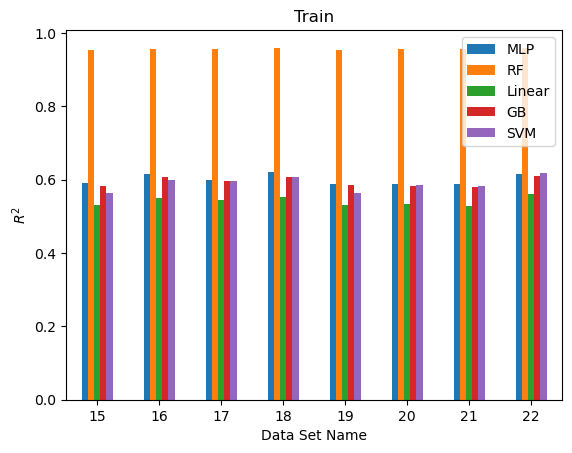

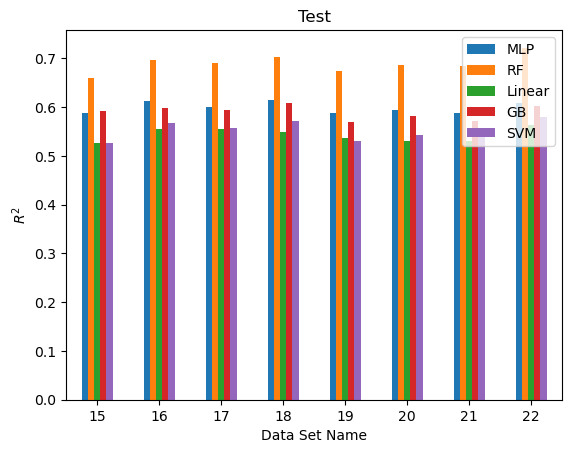

In [6]:
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                      json_prep_base, json_prep_counts, \
                                      json_train_base, json_train_counts, \
                                      json_extract_base, json_extract_counts)

df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                 trained_models_metrics)

In [7]:
data_defn

,temporal_data [%],spatial_data [%],max_history [hrs],hist_interval [hrs]
15,0.543198,0.595586,16,4
16,0.543198,0.595586,20,4
17,0.543198,0.595586,24,4
18,0.543198,0.595586,28,4
19,0.543198,0.595586,32,8
20,0.543198,0.595586,40,8
21,0.543198,0.595586,48,8
22,0.543198,0.595586,56,8


In [8]:
df_train

,MLP,RF,Linear,GB,SVM
15,0.589751,0.952526,0.530044,0.583346,0.563011
16,0.615640,0.957486,0.549440,0.608641,0.599791
17,0.600424,0.956290,0.544940,0.597591,0.595280
18,0.621862,0.958729,0.553924,0.607832,0.607784
19,0.588692,0.954176,0.530473,0.584983,0.564093
20,0.589061,0.955653,0.534974,0.583930,0.586348
21,0.587708,0.955963,0.527456,0.578846,0.583420
22,0.614419,0.960020,0.561120,0.610920,0.618449


In [9]:
df_test

,MLP,RF,Linear,GB,SVM
15,0.587938,0.660581,0.526228,0.591744,0.525340
16,0.611768,0.696309,0.554377,0.597487,0.567907
17,0.599618,0.689546,0.554218,0.594696,0.556709
18,0.614665,0.701820,0.547958,0.608124,0.570698
19,0.587019,0.674436,0.535807,0.570034,0.531387
20,0.594970,0.685570,0.530884,0.582030,0.542551
21,0.587685,0.683389,0.529678,0.571116,0.537737
22,0.608018,0.721703,0.562964,0.602312,0.579310


### Binary

In [10]:
json_extract_counts = range(15, 23)
json_prep_counts = [2]
json_train_counts = [1, 3, 2]#[3, 5, 1, 2]
FM_label_type = "Binary"

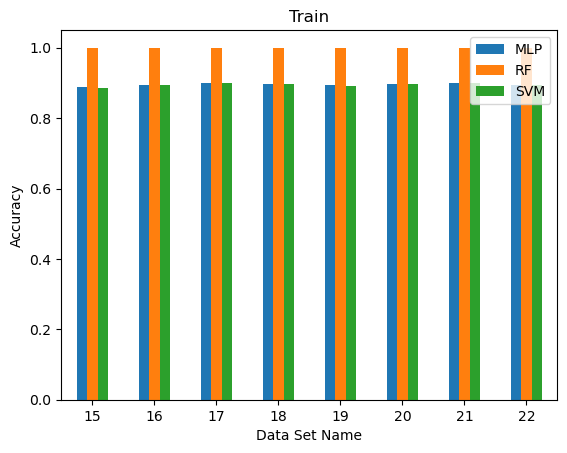

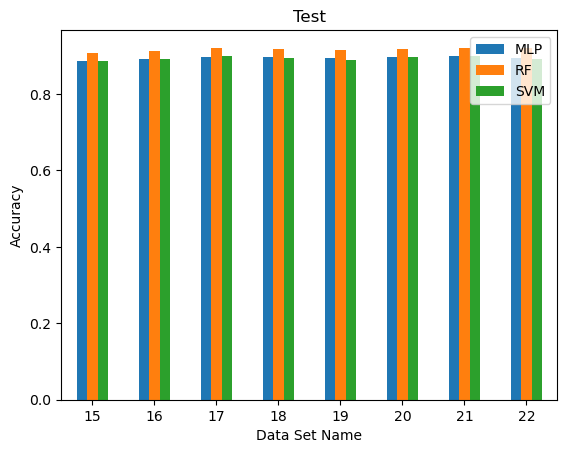

In [11]:
trained_models_metrics, data_defn = create_trained_models_metrics (\
                                  json_prep_base, json_prep_counts, \
                                  json_train_base, json_train_counts, \
                                  json_extract_base, json_extract_counts)

df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                 trained_models_metrics)

In [12]:
data_defn

,temporal_data [%],spatial_data [%],max_history [hrs],hist_interval [hrs]
15,0.543198,0.595586,16,4
16,0.543198,0.595586,20,4
17,0.543198,0.595586,24,4
18,0.543198,0.595586,28,4
19,0.543198,0.595586,32,8
20,0.543198,0.595586,40,8
21,0.543198,0.595586,48,8
22,0.543198,0.595586,56,8


In [13]:
df_train

,MLP,RF,SVM
15,0.887787,0.999992,0.886792
16,0.893045,0.999988,0.892988
17,0.898565,0.999988,0.899385
18,0.896678,0.999995,0.898158
19,0.892925,0.999985,0.892667
20,0.897045,0.999985,0.896393
21,0.900702,0.999988,0.900743
22,0.893240,0.999988,0.895482


In [14]:
df_test

,MLP,RF,SVM
15,0.88722,0.90652,0.88665
16,0.89126,0.91316,0.89239
17,0.89806,0.92023,0.89863
18,0.89778,0.91767,0.89483
19,0.89295,0.91563,0.89016
20,0.89719,0.91702,0.89648
21,0.89874,0.92103,0.89876
22,0.89367,0.91926,0.89261


## Scatter Plots

In [ ]:
json_extract_counts = [15, 16, 17] #[2, 3, 4, 5, 6, 7, 8]
json_prep_counts = [1]
json_train_counts = [1, 3]

In [ ]:
max_data_size_scatter = 800
fig_size_x = 8
fig_size_y = 8
font_size  = 10
x_lim      = [0, 0.7]

In [ ]:
data_identifier = "Train"

In [ ]:
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')      

In [ ]:
data_identifier = "Test"

In [ ]:
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        #print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')      